# <p style="text-align: center;"> Final Project - Programming for Data Science</p>
# <p style="text-align: center;"> <b> Data Exploration & Preprocessing </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Nguyen Khanh Nhan | 21127657         |
| Tran Dai Nien     | 21127664 |

## Table of Contents
- [0. Import libraries](#0-import-libraries)
- [1. Load data](#1-load-data)
- [2. Basic information about the dataset](#2-basic-information-about-the-dataset)
    - [2.1 Context of the dataset](#21-context)
    - [2.2 Meaning of each column](#22-meaning-of-each-columns)
- [3. Specific information about the dataset](#3-specific-information-about-the-dataset)
    - [3.1 Rows and columns](#31-rows-and-columns)
    - [3.2 Meaning of each row](#32-what-is-the-meaning-of-each-row)
    - [3.3 Duplicated rows](#33-are-there-duplicated-rows)
    - [3.4 Column data types](#34-column-data-type)
    - [3.5 Missing values on each row](#35-missing-values-on-each-row)
- [4. Numerical column](#4-numerical-column)
    - [4.1 Missing values](#41-missing-values)
    - [4.2 Distribution and descriptive statistics](#42-distribution-and-descriptive-statistics-of-numerical-attributes)
- [5. Categorical column](#5-categorical-column)
    - [5.1 Missing values](#51-missing-values)
    - [5.2 Different values in categorical columns](#52-different-values-in-each-categorical-column)
- [6. Abnormal values and outliers](#6-check-abnormal-values-and-outliers)
- [7. Correlation between attributes](#7-correlation-between-attributes)

---

## 0. Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load data

In [2]:
df = pd.read_csv('./data/spotify-2023.csv', encoding='Latin-1', thousands=',')

# get 5 random samples
df.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
645,Esqueï¿½ï¿½a-Me Se For C,"Marï¿½ï¿½lia Mendonï¿½ï¿½a, Maiara &",2,2021,10,14,580,0,258316038,24,...,122,F#,Minor,80,62,69,28,0,13,7
755,IDGAF (with blackbear),"Blackbear, BoyWithUke",2,2022,3,18,625,0,197643795,10,...,98,F,Major,78,83,75,41,0,27,8
396,Dreamers [Music from the FIFA World Cup Qatar ...,"BTS, Jung Kook, FIFA Sound",3,2022,11,20,889,20,323358833,11,...,115,NaN,Major,71,34,88,16,0,44,4
912,Talk,YEAT,1,2022,9,2,920,0,148461629,10,...,140,E,Minor,70,26,76,8,0,54,23
935,On BS,"Drake, 21 Savage",2,2022,11,4,1338,0,170413877,9,...,158,A,Major,84,33,36,2,0,39,59


## 2. Basic information about the dataset

### 2.1 Context

- Most famous songs of 2023 as listed on `Spotify`

### 2.2 Meaning of each columns

| Column                 | Meaning                                                      |
|------------------------|--------------------------------------------------------------|
| `track_name`           | Name of the song.                                            |
| `artist(s)_name`       | Name of the artist(s) of the song.                           |
| `artist_count`         | Number of artists contributing to the song.                  |
| `released_year`        | Year when the song was released.                             |
| `released_month`       | Month when the song was released.                            |
| `released_day`         | Day of the month when the song was released.                 |
| `in_spotify_playlists` | Number of Spotify playlists the song is included in.        |
| `in_spotify_charts`    | Presence and rank of the song on Spotify charts.             |
| `streams`              | Total number of streams on Spotify.                         |
| `in_apple_playlists`   | Number of Apple Music playlists of the song is included in. |
| `in_apple_charts`      | Presence and rank of the song on Apple Music charts.         |
| `in_deezer_playlists`  | Number of Deezer playlists the song is included in.          |
| `in_deezer_charts`     | Presence and rank of the song on Deezer charts.              |
| `in_shazam_charts`     | Presence and rank of the song on Shazam charts.              |
| `bpm`                  | Beats per minute, a measure of song tempo.                   |
| `key`                  | Key of the song.                                             |
| `mode`                 | Mode of the song (major or minor).                           |
| `danceability_%`       | Percentage indicating how suitable the song is for dancing.  |
| `valence_%`            | Positivity of the song's musical content.                    |
| `energy_%`             | Perceived energy level of the song.                          |
| `acousticness_%`       | Amount of acoustic sound in the song.                        |
| `instrumentalness_%`   | Amount of instrumental content in the song.                  |
| `liveness_%`           | Presence of live performance elements.                       |
| `speechiness_%`        | Amount of spoken words in the song.                          |

## 3. Specific information about the dataset

### 3.1 Rows and columns

In [3]:
print(f"The number of rows is {df.shape[0]}")
print(f"The number of columns is {df.shape[1]}")

The number of rows is 953
The number of columns is 24


✅The dataset has `953` rows and `24` columns.

In [4]:
col_name = df.columns
print(f"Tên các cột của dữ liệu: {col_name}")

Tên các cột của dữ liệu: Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


### 3.2 What is the meaning of each row?

✅ A row represents the information of a song (`name`, `artist_name`, `released year`,...) and some of its properties in `Spotify` in 2023.

### 3.3 Are there duplicated rows?

In [5]:
print(f"The dataset has {df.duplicated().sum()} duplicated rows")

The dataset has 0 duplicated rows


✅ There is no duplicated rows in our dataset.

### 3.4 Column data type

- Now, we will check the data type of each column.

In [6]:
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

✅ There are some inapropriate columns' data types:

- `streams` must be `int64` type.

🔧 Convert them to `int64` type.

In [7]:
ob_to_int_cols = ['streams']

for col in ob_to_int_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')

✅ Checkk the data type of each column again to make sure that we have converted them successfully.

In [197]:
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

❌ There is a strange thing that after converting, `streams`, is now `float64` type not `int64` type. <br>
✅ The reason is that there are some `NaN` values in these columns. Based on the rule of `pandas`, if there is at least one `NaN` value in a `int64` column, the data type of that column will be `float64` type. This is called `upcasting`. So, for now we will leave it like that.

### 3.5 Missing values on each row

🕵️ We will check the number of missing value in each row.  <br>
- In our dataset, each row has `24` columns. So, if a row has more than `12` missing values, we will **drop** it.

In [8]:
# Count the number of missing values in each row
missing_values_per_row = df.isnull().sum(axis=1)

# Count the number of rows for each count of missing values
count_of_missing_values = missing_values_per_row.value_counts().sort_index()

for missing_count, row_count in count_of_missing_values.items():
    percentage = round(row_count * 100.0 / df.shape[0], 2)
    print(f"The number of rows missing {missing_count} values: {row_count} rows ({percentage}%).")

total_percentage = round(sum(count_of_missing_values[1:]) * 100.0 / df.shape[0], 2)
print(f'\nThe number of rows with missing data: {sum(count_of_missing_values[1:])} ({total_percentage}%)')

The number of rows missing 0 values: 816 rows (85.62%).
The number of rows missing 1 values: 128 rows (13.43%).
The number of rows missing 2 values: 9 rows (0.94%).

The number of rows with missing data: 137 (14.38%)


✅ **Comment:** <br>
- There is no row that has more than `12` missing values. So, we don't need to drop any row. <br>
- In total, there are 137 rows that contain missing values but the number of missing values in each row is very small (`1`, `2` ).

## 4. Numerical column

🕵️ We will explore deeper all the numerical columns in our dataset. First, we will see which they are.

In [9]:
numerical_cols_df = df[df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]]
numerical_cols = list(numerical_cols_df.columns)
list(numerical_cols)

['artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

✅ There are total `20` numerical columns in our dataset.

####  4.1 Missing values

🕵️ Number of missing values of each columns

In [10]:
numerical_cols_df.isna().sum()

artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

🕵️ The percentage of missing values for each columns

In [11]:
numerical_cols_df.isnull().mean() * 100

artist_count            0.000000
released_year           0.000000
released_month          0.000000
released_day            0.000000
in_spotify_playlists    0.000000
in_spotify_charts       0.000000
streams                 0.104932
in_apple_playlists      0.000000
in_apple_charts         0.000000
in_deezer_playlists     0.000000
in_deezer_charts        0.000000
in_shazam_charts        5.246590
bpm                     0.000000
danceability_%          0.000000
valence_%               0.000000
energy_%                0.000000
acousticness_%          0.000000
instrumentalness_%      0.000000
liveness_%              0.000000
speechiness_%           0.000000
dtype: float64

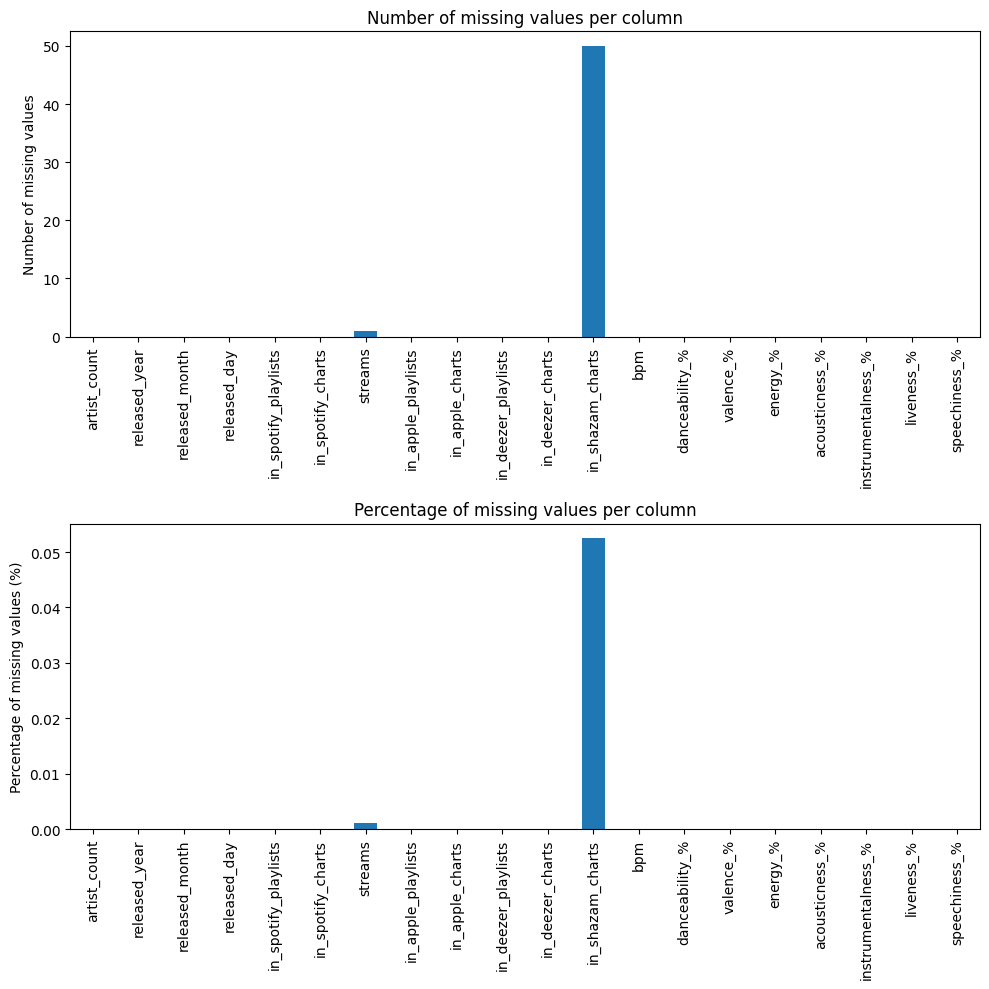

In [12]:
missing_values_per_column = numerical_cols_df.isnull().sum()
missing_values_per_column_percent = missing_values_per_column / numerical_cols_df.shape[0]
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
missing_values_per_column.plot.bar(ax=ax[0])
ax[0].set_ylabel('Number of missing values')
ax[0].set_title('Number of missing values per column')
missing_values_per_column_percent.plot.bar(ax=ax[1])
ax[1].set_ylabel('Percentage of missing values (%)')
ax[1].set_title('Percentage of missing values per column')
plt.tight_layout()
plt.show()

✅**Comment:**
- There are `2` numerical columns that have missing values: `streams`, `in_deezer_playlists`, `in_shazam_charts`.
- All of them have very small percentage of missing values (`<10%`), so we don't need to drop any of them.
- We will fill the missing values in the `preprocessing` part.

🔧 Now, we will fill the missing values in these columns:
- The `streams` column has only one `NaN` value, so we will fill that value with the `median value` of the column. Because this column has `std` value is very large, so we will use `median` instead of `mean` to fill the missing value.
- For the `in_deezer_playlists` column, there is problem that there is commas in the value. So, we will remove the commas.
- `in_shazam_charts` has a significant number of missing values, so it would be best to use the `KNNImputer` to fill in the missing values. We will use `KNNImputer`to fill missing values in `in_shazam_charts` column based on the values of `in_spotify_charts`, `in_apple_charts`, `in_deezer_charts` columns. Because these columns have the same meaning.

In [13]:
from sklearn.impute import KNNImputer

old_df = df[['streams', 'in_shazam_charts']].copy()

# Fill missing value for streams column
df['streams'].fillna(df['streams'].median(), inplace=True)
# Remove commas
df['in_deezer_playlists'] = df['in_deezer_playlists'].replace(',', '', regex=True)
# Fill missing value for in_shazam_charts 
k_neighbours = 3
knn_imputer = KNNImputer(n_neighbors=k_neighbours)
df[['in_shazam_charts', 'in_spotify_charts', 'in_deezer_charts', 'in_apple_charts']] = knn_imputer.fit_transform(df[['in_shazam_charts', 'in_spotify_charts', 'in_deezer_charts', 'in_apple_charts']])

🕵️ Check the number of missing values in each numerical column again to make sure that we have filled them successfully.

In [14]:
df[numerical_cols].isna().sum()

artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

✅ Now, there is no missing value in these `3` numerical columns.

🕵️To check if imputation has a negative impact on the columns, we will examine the distribution of the columns after imputation and compare it to the distribution before imputation using a `KDE plot`.
- A `KDE plot` is commonly used to gain a better understanding of the distribution of a random variable, examine symmetry, concentration, and tails of the data, and compare distributions between different groups.

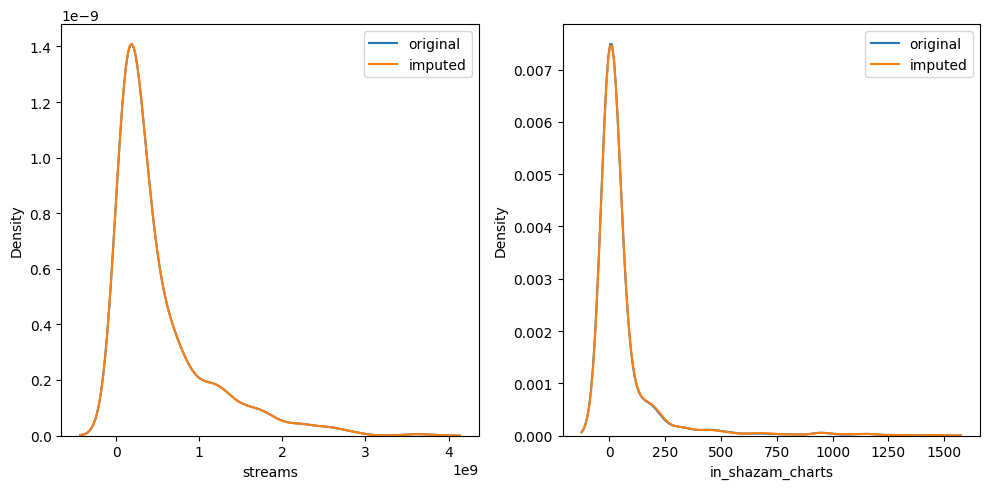

In [15]:
cols = ['streams', 'in_shazam_charts']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for col, i in zip(cols, [0, 1]):
    sns.kdeplot(old_df[col], ax=axes[i], label='original')
    sns.kdeplot(df[col], ax=axes[i], label='imputed')
    axes[i].legend()
    
plt.tight_layout()
plt.show()    

✅We can see that the `distribution` of the columns `after imputation` is **not significantly different** from the distribution `before imputation`. Therefore, we can conclude that imputation **does not have a negative impact** on the columns.

❌ One more thing is that these 2 columns must contain `int64` type values, but after filling the missing values, they now contain `float64` type values. So, we will apply `round()` function to convert them to `int64` type.


In [57]:
df[['streams', 'in_shazam_charts']] = df[['streams', 'in_shazam_charts']].apply(round)

### 4.2 Distribution and descriptive statistics of numerical attributes

🕵️ Some descriptive statistics of numerical attributes

In [ ]:
!pip install summarytools

In [58]:
from summarytools import  dfSummary
dfSummary(df[numerical_cols])

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,artist_count[int64],Mean (sd) : 1.5 (0.8)min < med < max:1.0 < 1.0 < 8.0IQR (CV) : 1.0 (1.8),8 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/SrBM8AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACKklEQVR4nO3dPasaQRSH8XPWF9ar7KCCdjbpU1jap82HTZveb5EvIMh1xb3XKJtNE0MgL7qzmLt/eX61Myg8KKMHx6uqMqDtkrd+AsAtutce4O4DM+tH7n+qquo1ci3w0z9DdffBdDr9mGXZOGbz/X7/7O6fiBVNXXtH7WdZNl6tVq8hhGOdjfM8T9fr9Xi73fbNjFDRyNWPfjOzEMJxNpu9ROw/iFgD/IbDFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiTcdCtKrLIse2aWuXvsFlyoBjO7Y6hFUfTO5/P7xWLR6XQ6te6ouuBCNVzcLdTT6dRN0/RpuVwe5/P5c931XKiGX931o9/MbDgcxl6mZsaFaviBwxQkECokECokECokECokECokECokECokECokECokECokECokECok3H16qomGg9cMXT+Q1obadPCaoevH0tpQmwxeM3T9eFob6kWDwWuGrh8IhylIIFRIIFRIIFRIaP1h6q24+8DM+pHLEzP7FrmW73//4KZQ8zxP6258OBxSM7OiKNLNZvP0P9fneZ6WZdm1+B8L0slk8iGEMKq7sCzLXlEU70aj0ZckSc511+92u4O7fzazqD/tEPa1qqq/vubvCbylWO/+mtcAAAAASUVORK5CYII="">",0(0.0%)
2,released_year[int64],Mean (sd) : 2018.0 (11.2)min < med < max:1942.0 < 2022.0 < 2023.0IQR (CV) : 2.0 (180.8),48 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/SrBM8AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACSUlEQVR4nO3XsW7aUBSH8XNpoIbAvTJIvEA38gbe2zEP27VbB16grExsCASmOCAMdodKVZc0sYGSf/T9VnPwsfTJF1xZlga8dY1bLwC8xt2tF8D74Zxrm1mr5vihLMvdcxcJFRfhnGsPBoNH731cZ36z2aycc1+fi5VQcSkt732cJMkuhLCvMpimaTQej+PlctkyM0LF9YUQ9sPh8KnGaPtfF/kzBQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgl3t14Ab4dzrm1mrZrjviiK5iX3+Ruhwsx+RzoYDB6993Gd+TzPo9Pp9LDf77+b2dOF1yNU/NHy3sdJkuxCCPuqw7PZLJ5MJp3j8fjhGssR6jtzxvHti6JohhBWw+Gw8htxtVq1a9zz1a4a6pm/eczMDmVZ7i61z/9y5nM3zKyoORv1+/0vIYT7qoPXPrrP9WKozrnIzD7W+O6o3+9/DiF0a8yamdl6vd46576ZWeWj6IZqP/fpdGpmWfap2+1OG41GXnU+z/PIzB5Go9GPXq/3s8rsYrGIptNpJ03T+/l8fqh67+12G5mZZVkWzefzTpXZNE2jlz7zC7wlgAyvCF7hAAAAAElFTkSuQmCC"">",0(0.0%)
3,released_month[int64],Mean (sd) : 6.1 (3.6)min < med < max:1.0 < 6.0 < 12.0IQR (CV) : 6.0 (1.7),12 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/SrBM8AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACt0lEQVR4nO3dwYraQBjA8W/qKlEhQQS9+QKFHjz6EH3YPkIPPoFv4E0QiZhuMMb00i6FUo35Ms184f87b7JC/q4zk4nrqqoSIHSfun4BQB1vz37AOTcWkVHD81+rqnpveCzw4WGozrnxfD7/GsfxrMnJz+fzyTn3jVih9ewv6iiO49lms3lPkiR/5cRpmkbb7XZ2PB5HIkKoUHn60S8ikiRJvlgsfjQ4/7jBMcBfmEzBBEKFCYQKEwgVJhAqTCBUmECoMIFQYUKtBX+gDp/7QggVrfC9L4RQ0Rav+0IIFa3ytS+EyRRMIFSYQKgwgVBhAqHCBEKFCYQKEwgVJvR2wV9531mE7yQISi9D1d53FuE7CULTy1BFcd9ZhO8kCFFfQxUR1X1nEb6TIChMpmACocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhQq/vTGmUZTkUkdg51+RwNrS0zGuoyost0tEFz7JsWBTFl9VqNRgMBi/vFWBDS/u8haq92CLdXfDr9foWRdFkvV7ny+Xy9MqxbGjxw1uomostEsYFn06n/JONQHgfoyoutggXHL8wmcIH5VMR8f1+H7b5ev5EqBAR/VMRRVFEZVl+zvP8u4g0/QT9p6BDVawaeH1395TqqYj9fj/b7XaT2+028PHigg1Vs2rg+939jOU12KZPRZxOJ6/ziWBD1awa+H53P8IarB/Bhvpbk1UD3+/uR1iD9SP4UK3qag1WMXMPelxPqD2imbl3Pa5/hlD7pfHMvctxfR2E2kNNZu5djuvrINTAKJe2gh5nahBqQLRLW6GPMzUINSDaHWehjzM1CDVATZe2Qh9navDMFEwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwoda9/jRNo1dPfLlcIhGRLMuiw+Ew+Z/HW/3dVl+39vg6ff0EpB68yEfhclgAAAAASUVORK5CYII="">",0(0.0%)
4,released_day[int64],Mean (sd) : 13.8 (9.2)min < med < max:1.0 < 13.0 < 31.0IQR (CV) : 15.2 (1.5),31 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/SrBM8AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoElEQVR4nO3cS47aQBRA0VehQQYkW4gWzNhApAwYsogsNksIEitgB8yQLMsIpy2McUbdU

🕵️ Distribution of numerical attributes

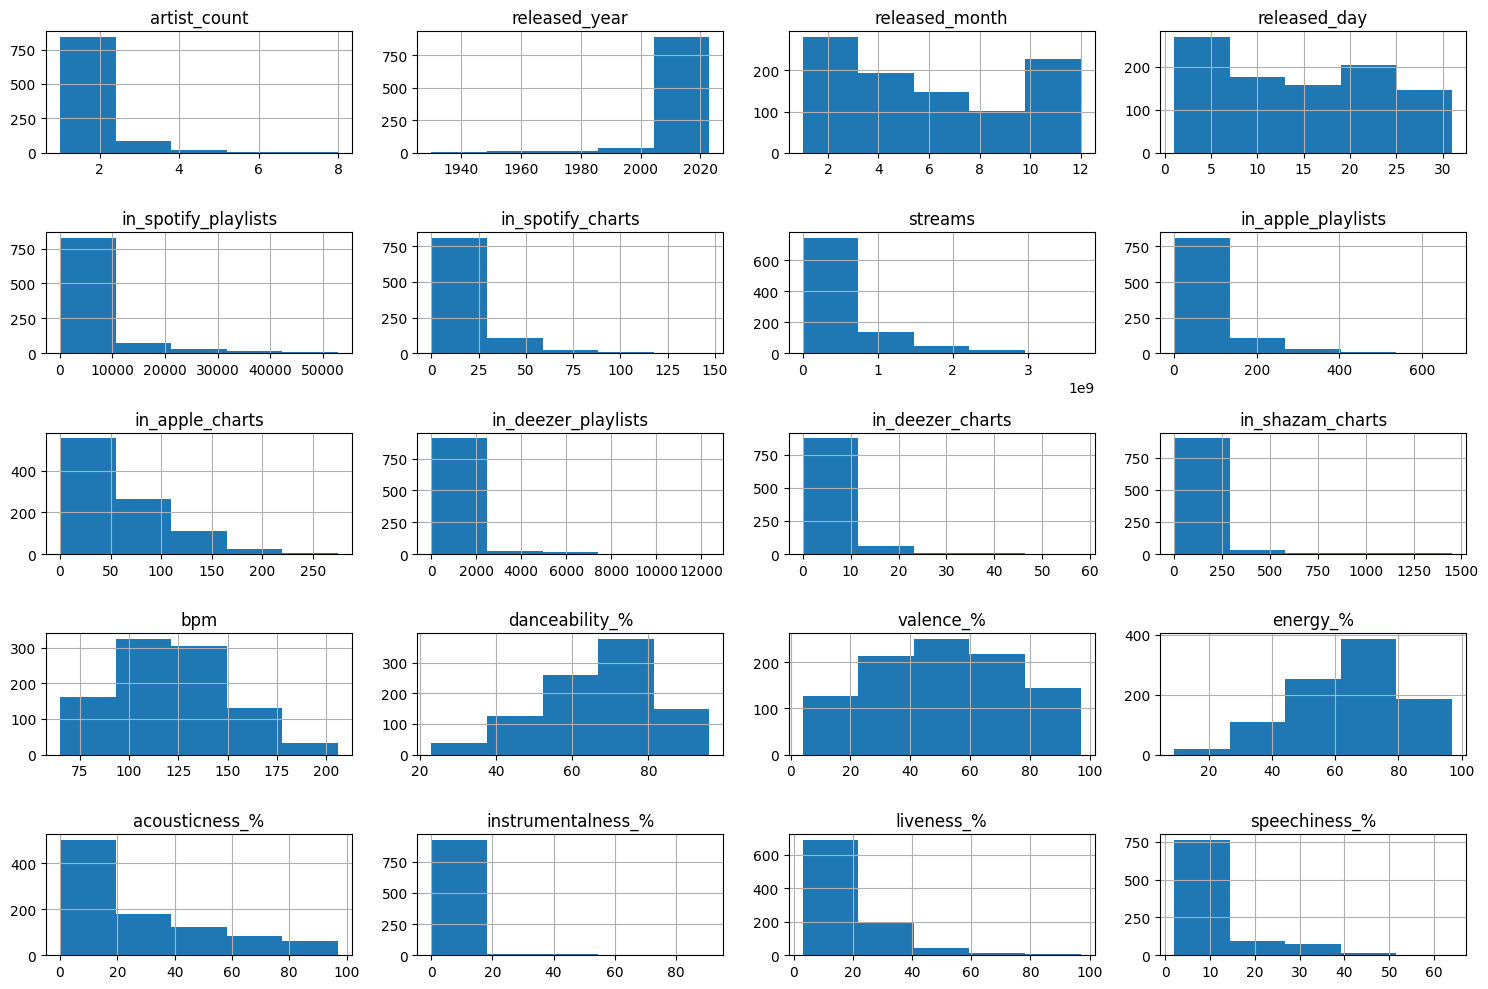

In [17]:
df[numerical_cols].hist(figsize=(15, 10), bins=5)
plt.tight_layout()
plt.show()

✅**Comment:**
- `bpm`, `danceability_%`, `valence_%` and `energy_%` have distributions that are close to normal distributions.
- Except for `released_year`, the remaining attributes have `right-skewed distributions`. It is understandable that `released_year` has a `left-skewed distribution` because the majority of the songs in the dataset were released in the `21st` century.
- The latest released song is from the year `2023`, while the oldest song dates back to `1930`.
- `released_month` and `released_day` have all values from `1` to `12` and `1` to `31`, respectively. This is reasonable because there are only `12` months and `31` days in a year.
- The highest number of `streams` is `3,703,895,074`, while the lowest number of streams is `2,762`.
- The average number of `streams` is `513,902,790.6` with a standard deviation of `566,605,452.0`, indicating large variations in online streaming counts.
- The highest and lowest `BPM` values are `206` and `65`, with an average value of `122.5`.
- The highest and lowest `danceability` percentages are `96%` and `23%`, with an average value of `67%`.
- The highest and lowest `valence` percentages are `97%` and `4%`, with an average value of `51.4%`.
- The highest and lowest `energy` percentages are `97%` and `9%`, with an average value of `64.3%`.
- The highest and lowest `acousticness` percentages are `97%` and `0%`, with an average value of `27.1%`.
- The highest and lowest `instrumentalness` percentages are `91%` and `0%`, respectively, with an average value of `1.6%`.
- The highest and lowest `presence of live performance elements` are `97%` and `3%`, respectively, with an average value of `18.2%`.
- The highest and lowest `speechiness` percentages are `64%` and `2%`, respectively, with an average value of `10.1%`.

## 5. Categorical column

🕵️ Let's look all the categorical columns in our dataset.

In [18]:
categorical_cols_df = df[df.columns[df.dtypes == 'object']]
categorical_cols = list(categorical_cols_df.columns)
categorical_cols

['track_name', 'artist(s)_name', 'key', 'mode']

### 5.1 Missing values
🕵️ Check the number of missing values in each categorical column.

In [19]:
df[categorical_cols].isna().sum()

track_name         0
artist(s)_name     0
key               95
mode               0
dtype: int64

✅ There is just one categorical column that has missing values: `key`.

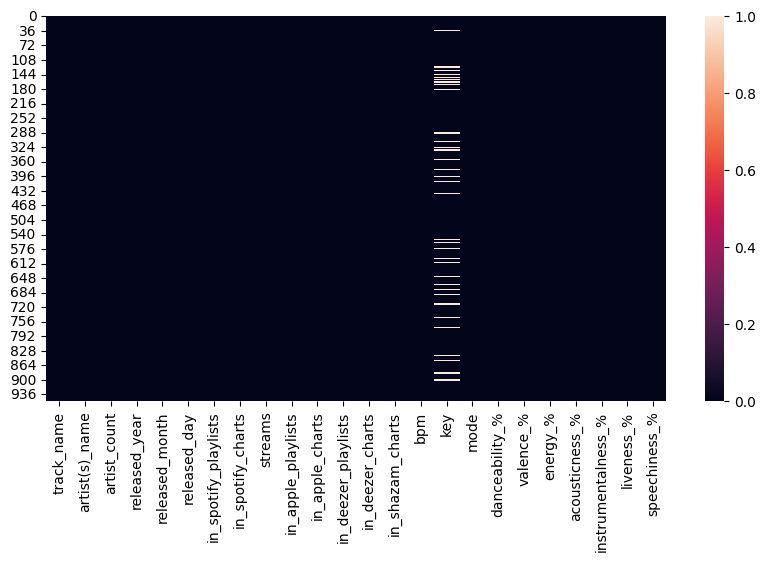

In [20]:
# Heatmap showing missing values in the `key` column
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.isnull(), ax=ax)
plt.show()

🔧 Now we will fill the missing values in this column. But at first, let's look at the values and their frequencies in this column.

In [21]:
df['key'].value_counts().to_frame()

,count
key,
C#,120
G,96
G#,91
F,89
B,81
D,81
A,75
F#,73
E,62


❌We can apply the `mode` method to fill in missing values for the `key` column, but in reality, this approach is not really effective. Alternatively, we can identify the missing keys based on the `track_name` and `artist(s)_name` to find out the appropriate values for those missing entries. <br>
✅ Lukily, We can use web scrapping from `Spotify`. There is a code that we can use to get the `key` of a song from `Spotify`, i get this code from [here](https://www.kaggle.com/code/andrsgyrefi/spotify-analysis).

In [ ]:
!pip install spotipy

In [22]:
# Import the spotipy library
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set up the Spotify API credentials
client_id = "24101b195b73495e9477d0e26779a9a3"
client_secret = "3c02a8aea8554a9899be23ddb3219c4f"

# Authenticate with Spotify
client_credentials_manager = SpotifyClientCredentials(client_id= client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_song_key(song_name):
    # Search for the song on Spotify
    results = sp.search(q = song_name, type="track", limit=1)
    tracks = results["tracks"]["items"]
    
    # Mapping of pitch class numbers to key names, rename from the offical Spotify to one which is more in-line with our database
    pitch_class_to_key = {
        0: 'C',
        1: 'C#',
        2: 'D',
        3: 'D#',
        4: 'E',
        5: 'F',
        6: 'F#',
        7: 'G',
        8: 'G#',
        9: 'A',
        10: 'A#',
        11: 'B'
    }
    
    if tracks:
        # Get the first track's ID
        track_id = tracks[0]["id"]
        
        # Retrieve the audio features for the track
        audio_features = sp.audio_features(track_id)[0]
        
        if audio_features:
        # Convert the pitch class to a key name
            key = pitch_class_to_key[audio_features['key']]
            return key
        else:
            return "Audio features not found."
    else:
        return "Song not found."

In [23]:
#Get the list of songs without a key based on name 
keyless = df.loc[df["key"].isnull(),"track_name"].tolist()
#Create a dictionary for the song-key pairs
song_keys = {}
for song in keyless:
    key = get_song_key(song)
    song_keys[(song)] = key

In [24]:
# Replace the null values based on our new data
for index, row in df.iterrows():
    if row["track_name"] in song_keys:
       df.loc[index, "key"] = song_keys[row["track_name"]]

🕵️ Check the number of different values in `key` column after filling missing values.

In [25]:
df["key"].value_counts().to_frame()

,count
key,
C#,121
G,96
G#,93
F,90
C,85
D,83
B,81
A,76
F#,74


In [26]:
print(f"The number of missing values in `key` column after fill in: {df['key'].isna().sum()}")

The number of missing values in `key` column after fill in: 0


✅ Afer filling missing values, there is new value in `key` column: `C`. It seems mostly `C` was missing from the `key` column.

### 5.2  Different values in each categorical column

✅ `track_name` has many different values because each song has a different name, it is understandable. So we will not check it.

🕵️ We will explore the  `artist(s)_name`, `key` and `mode` columns.

In [27]:
df['artist(s)_name'].str.split(', ').explode().value_counts()

artist(s)_name
Bad Bunny         40
Taylor Swift      38
The Weeknd        37
SZA               23
Kendrick Lamar    23
                  ..
Shilpa Rao         1
Conan Gray         1
La Joaqui          1
Steve Aoki         1
Selena Gomez       1
Name: count, Length: 699, dtype: int64

✅There are about `699` different artists in our dataset. We can not check all of them. So, we will check the top `30` artists that have the most songs in our dataset.

- First 30 artist with highest numbers of songs

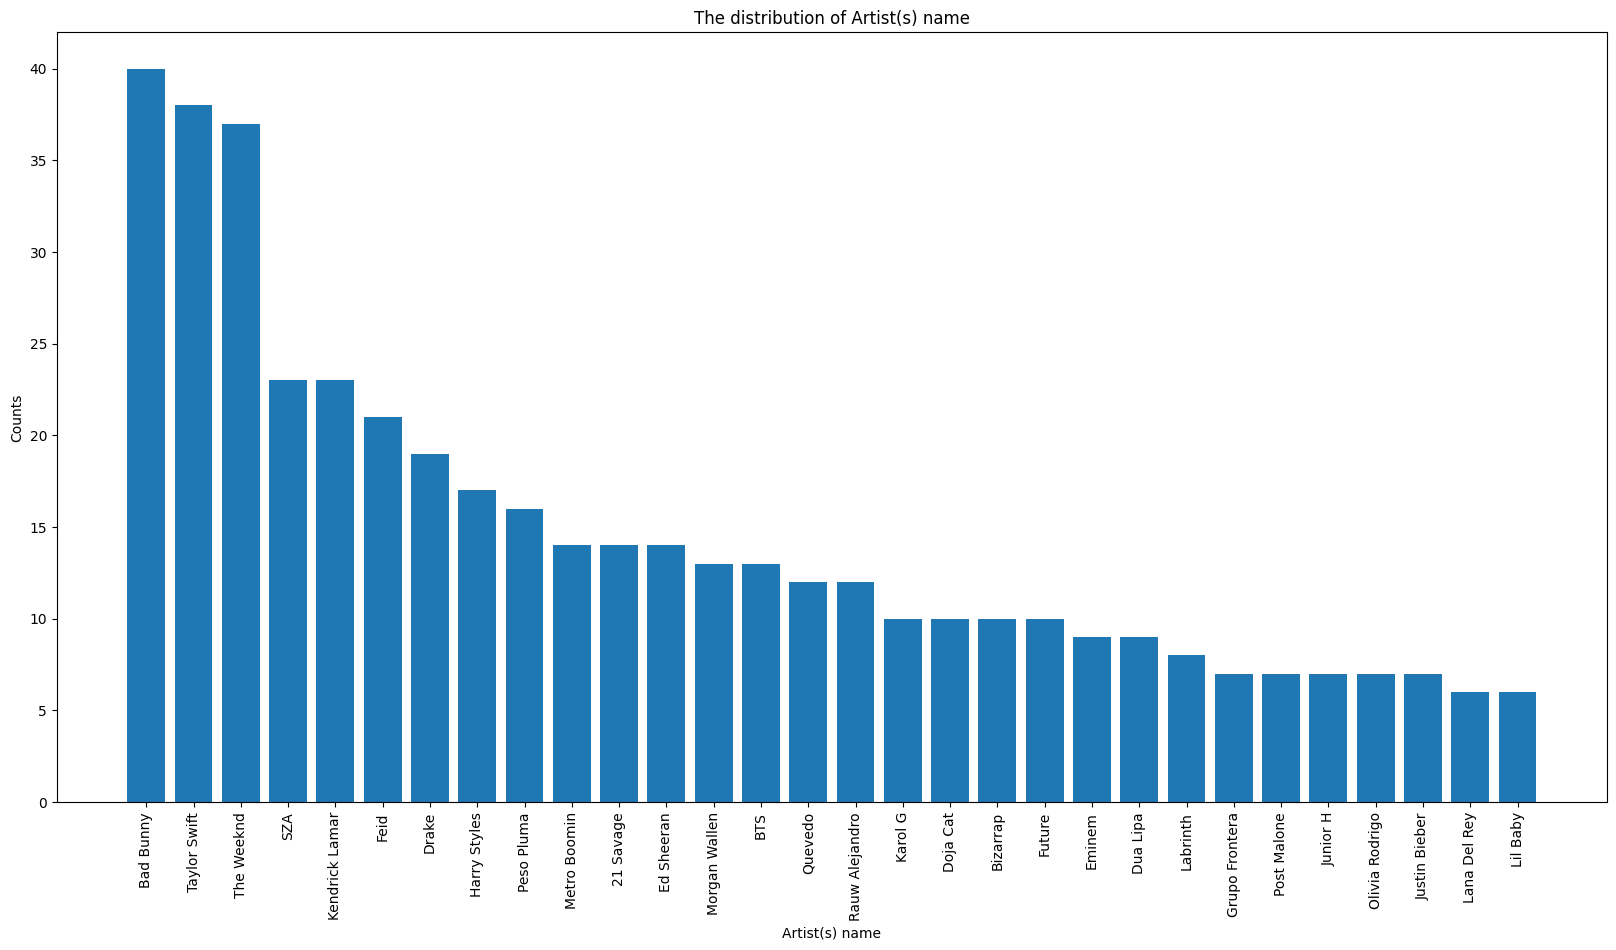

In [28]:
# Some songs have multiple artists, so we need to split the string and count the number of artists
artist_name_count = df['artist(s)_name'].str.split(', ').explode().value_counts()[:30]
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(artist_name_count.index, artist_name_count.values)
ax.set_xticks(range(len(artist_name_count.index)))
ax.set_xticklabels(artist_name_count.index, rotation=90)
ax.set_xlabel('Artist(s) name')
ax.set_ylabel('Counts')
ax.set_title('The distribution of Artist(s) name')
plt.show()

✅`Bad Bunny` is the artist that has the most songs in our dataset: `40` songs. Followed by `Talor Swift` with `38` songs and `The Weekend` with `37` songs.

🕵️ The distribution of `key`

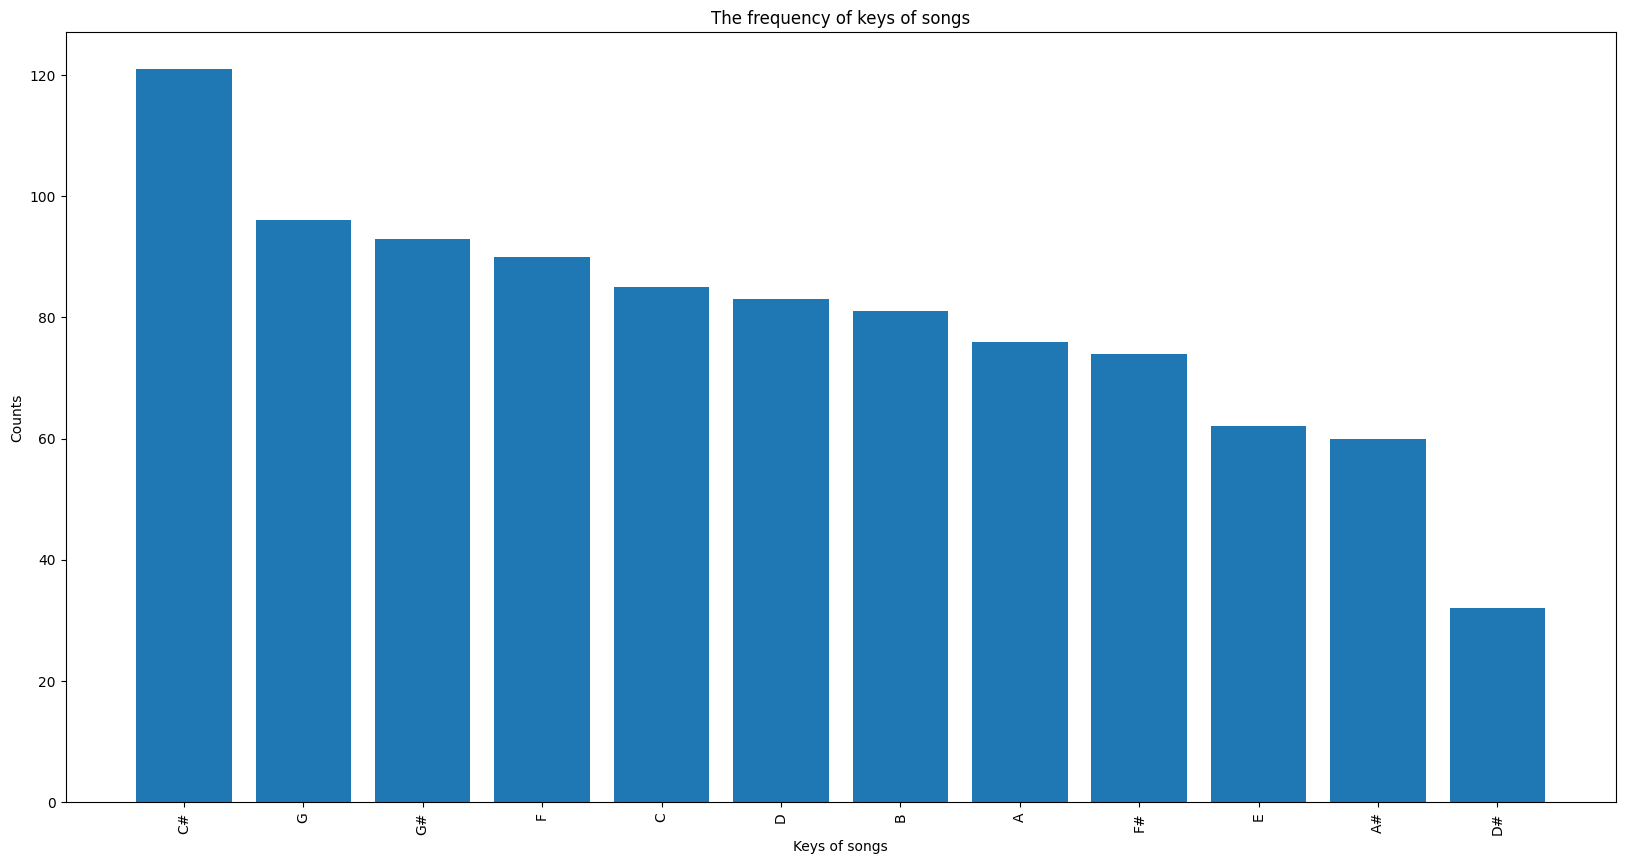

In [29]:
key_counts = df['key'].value_counts()

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(key_counts.index, key_counts.values)
ax.set_xticks(range(len(key_counts.index)))
ax.set_xticklabels(key_counts.index, rotation=90)
ax.set_xlabel('Keys of songs')
ax.set_ylabel('Counts')
ax.set_title('The frequency of keys of songs')
plt.show()

✅ **Comment:**
- `C#` is the most common key in our dataset with `121` songs. Followed by `G` with `96` songs and `G#` with `93` songs.
- `C` is the new key that we have just filled missing values. But it also has a significant number of songs: `85` songs.
- `D#` is the least common key in our dataset with `32` songs.

🕵️ The distribution of `mode`

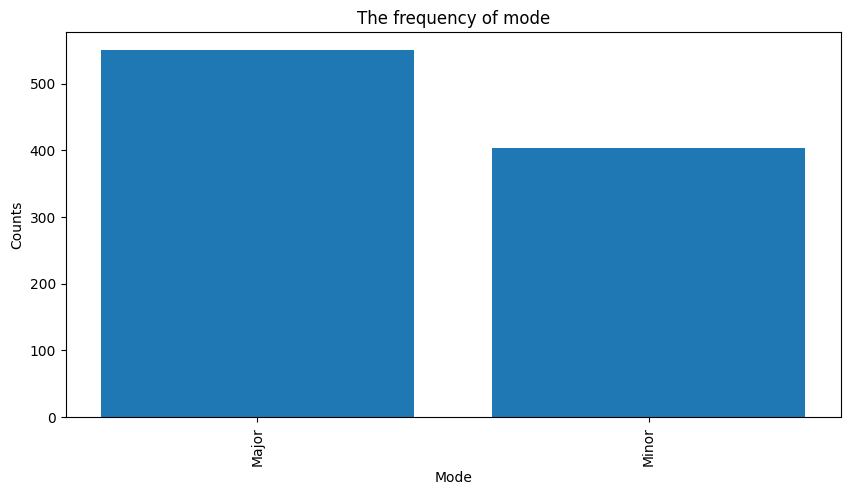

In [32]:
mode_counts = df['mode'].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(mode_counts.index, mode_counts.values)
ax.set_xticks(range(len(mode_counts.index)))
ax.set_xticklabels(mode_counts.index, rotation=90)
ax.set_xlabel('Mode')
ax.set_ylabel('Counts')
ax.set_title('The frequency of mode')
plt.show()

✅**Comment:**
- `major` is the most common mode in our dataset indicating that most of the songs in our dataset give a sense of happiness, optimism, and brightness.
- The remaining songs are in `minor` mode, which evoke a sense of sadness, melancholy, and darkness compared to the Major mode.

## 6. Check abnormal values and outliers

🕵️ There are quite a few songs and artist names that contain `special character (¿)`, resulting in incorrect entries. We will examine how many songs and artists have special characters. If there are only a few, we will make the necessary corrections. However, if there are too many, we will consider removing them (as it may not be feasible to manually fix each song and artist name).

In [52]:
wrong_name = list(df[(df['artist(s)_name'].str.contains('¿')) | (df['track_name'].str.contains('¿'))][['artist(s)_name', 'track_name']].index)

🔧 Remove rows that have `special character (¿)` in `track_name` and `artist(s)_name` columns.

In [54]:
df = df.drop(wrong_name, axis=0)

✅ Save the cleaned dataset to a new file.

In [59]:
df.to_csv('./data/processed_spotify-2023.csv', index=False)

🕵️Finally, as we observed the distribution of numerical columns above, there is **no abnormal value** so we will only check the outliers for some numerical columns in our dataset. We will use `boxplot` to check the outliers.

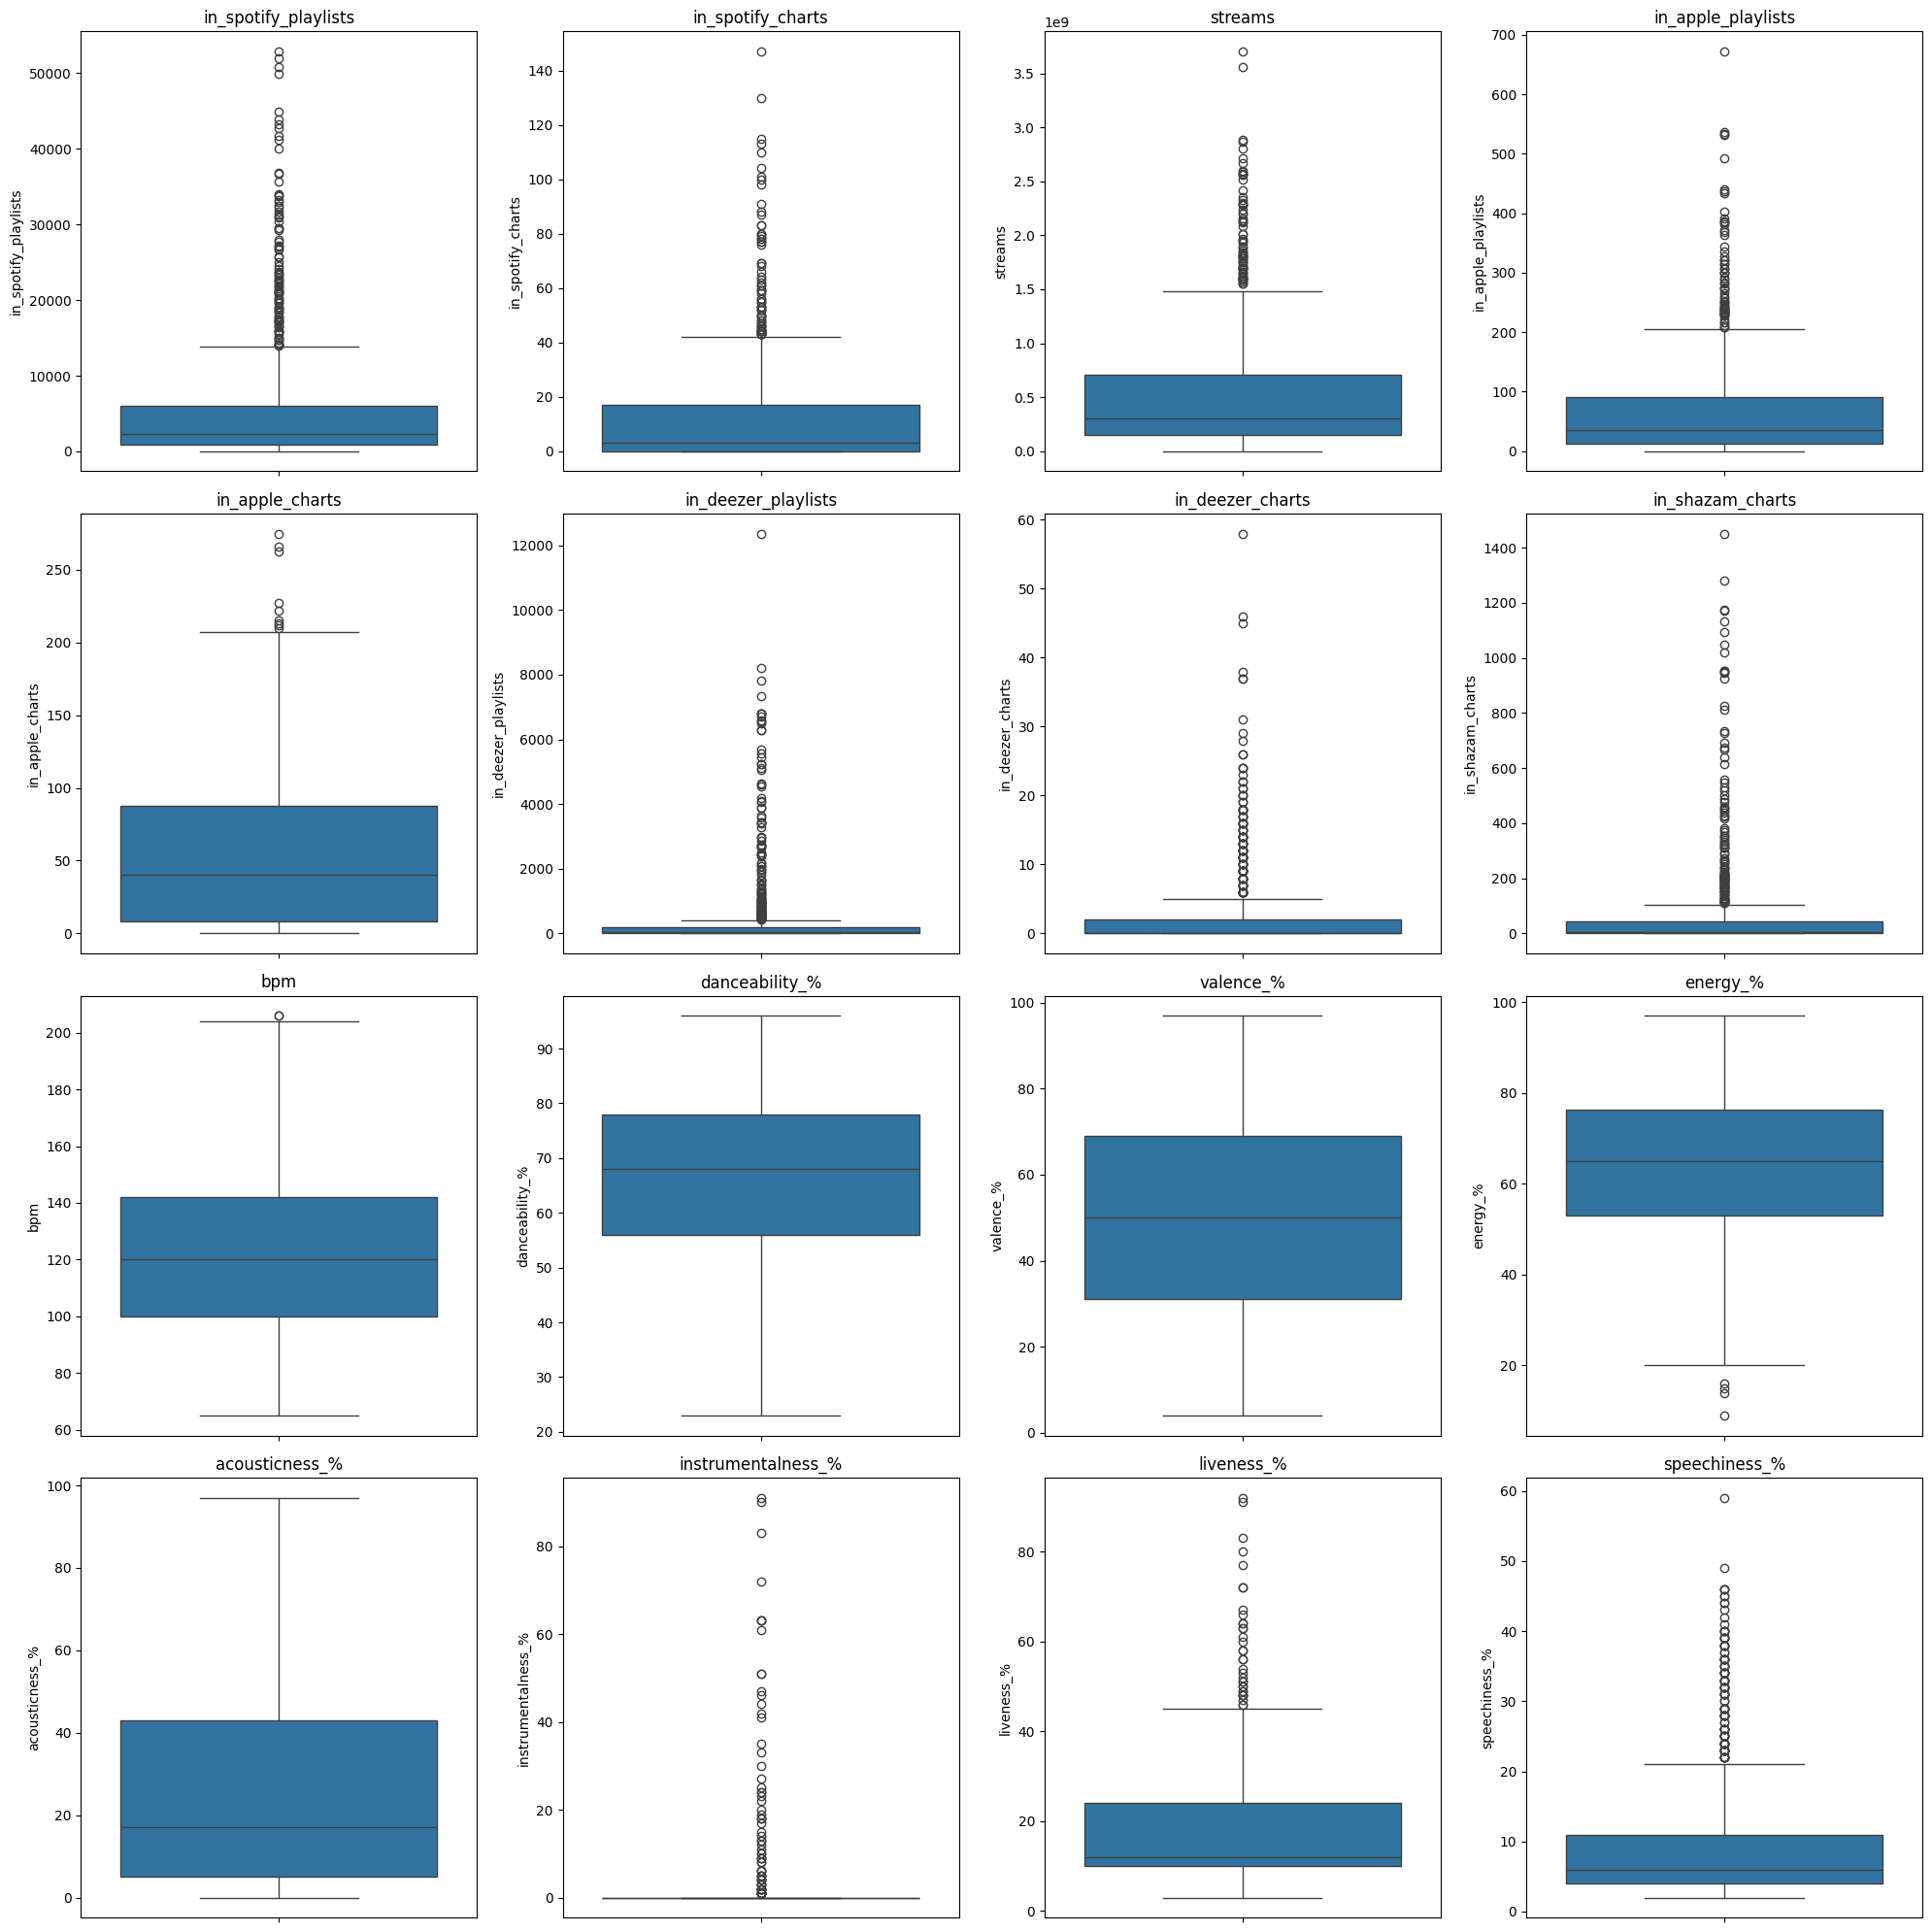

In [61]:
outlier_cols = ['in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
        'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for col, i in zip(outlier_cols, range(len(outlier_cols))):
    sns.boxplot(df[col], ax=axes[i//4][i%4])
    axes[i//4][i%4].set_title(col)
    
plt.tight_layout()
plt.show()


✅**Comment:**
- Columns related to the features of the songs, such as `bpm`, `danceability_%`, `valence_%`, `energy_%`, and `acousticness_%`, have either no or very few outliers. This indicates that the songs are quite similar in terms of these aspects. However, `instrumentalness_%`, `liveness_%`, and `speechiness_%` have some relatively large outliers. This is also understandable because these factors can vary depending on the genre of the song.
- Columns related to rankings, number of listeners, and streams also have **many outliers**. This is expected because these columns have a **wide range of values** due to the popularity of songs. Famous songs tend to have a high number of listeners, streams, and rankings, while less popular songs have fewer listeners, streams, and lower rankings.

## 7. Correlation between attributes

🕵️ First, we will check the correlation between columns related to the features of the song: `bpm`, `danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, `instrumentalness_%`, `liveness_%`, `speechiness_%`.



-  The `Pearson correlation coefficient` does not have the ability to assess monotonic relationships between two variables (both linear and nonlinear). In this case, we need a better metric to measure this type of relationship. One such metric is the `Spearman correlation coefficient`.
- `Pearson` and `Spearman` correlations are similar when it comes to assessing linear relationships.
- `Spearman` is better at estimating monotonic (but nonlinear) relationships between variables, while `Pearson` tends to underestimate this type of relationship.

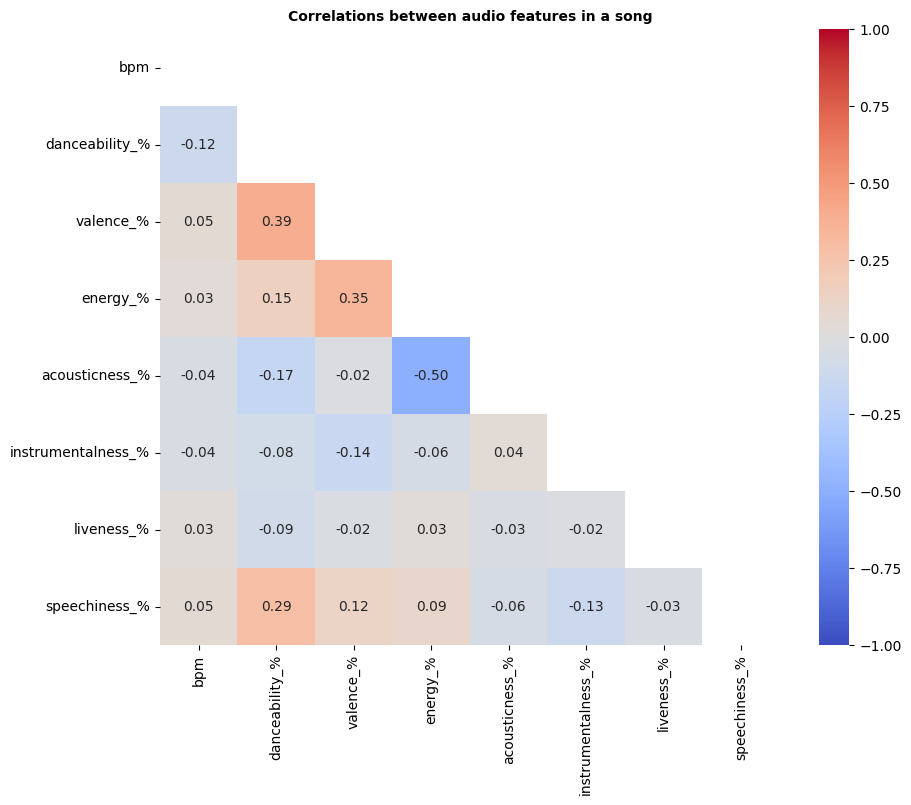

In [65]:
audio_features_columns = ['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%']
correlation_matrix = df[audio_features_columns].corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', mask=mask)
plt.title('Correlations between audio features in a song', fontsize=10, fontweight='bold')
plt.show()

✅ **Comment:**
- `valence_%` has a moderately positive correlation with `danceability_%` and `energy_%`, with correlation coefficients of `0.39` and `0.35`.
- `acousticness_%` has a relatively large negative correlation with `energy_%`, with a correlation coefficient of `-0.5`.
- The remaining pairs have insignificant correlations with each other.

🕵️ To observe the specific correlations between `valence_%` and `danceability_%`, `energy_%`, as well as between `acousticness_%` and `energy_%`, we can use `scatter plot`.

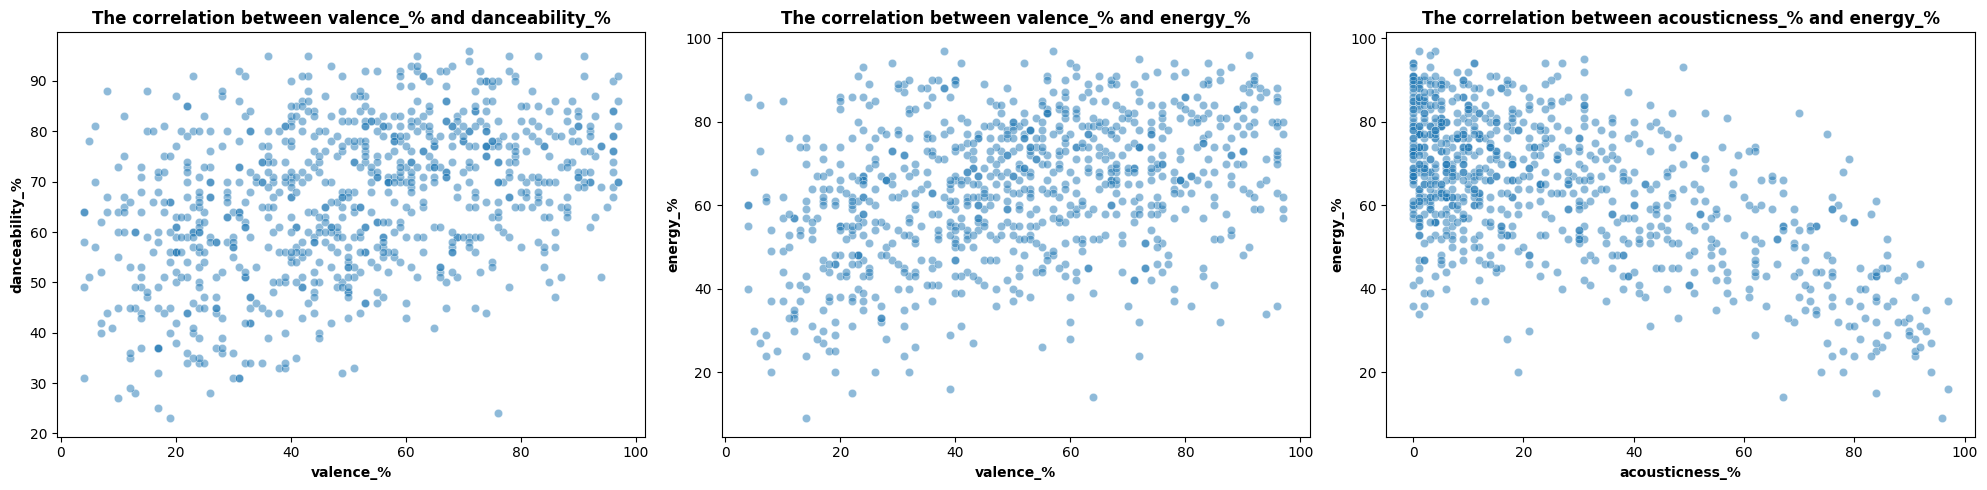

In [67]:
x = ['valence_%', 'valence_%', 'acousticness_%']
y = ['danceability_%', 'energy_%', 'energy_%']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for i in range(len(x)):
    sns.scatterplot(x=x[i], y=y[i], data=df, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'The correlation between {x[i]} and {y[i]}', fontweight='bold')
    axes[i].set_xlabel(x[i], fontweight='bold')
    axes[i].set_ylabel(y[i], fontweight='bold')
plt.tight_layout()
plt.show()

🕵️ Finally, we will check the correlation between columns related to the number of streams, playlists and rankings of songs on different music platforms.: `in_spotify_playlists`, `in_spotify_charts`, `in_apple_playlists`, `in_apple_charts`, `in_deezer_playlists`, `in_deezer_charts`, `in_shazam_charts`.

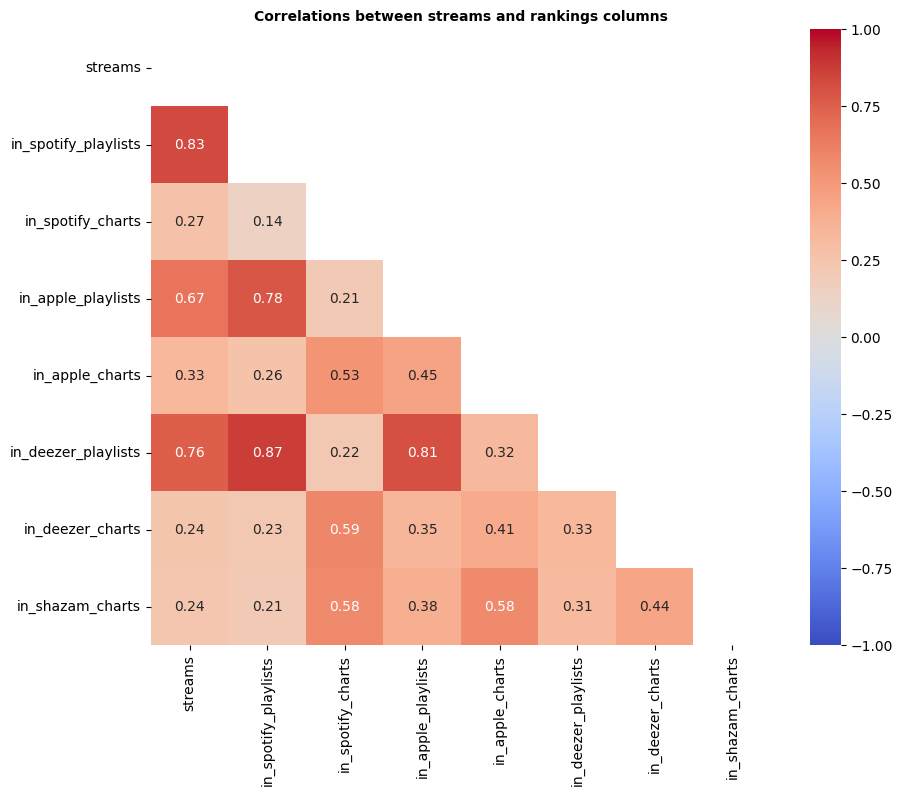

In [68]:
stream_and_ranking_cols = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
correlation_matrix = df[stream_and_ranking_cols].corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', mask=mask)
plt.title('Correlations between streams and rankings columns', fontsize=10, fontweight='bold')
plt.show()

✅**Comment:**
- All columns have **positive correlations** with each other.
- `streams` and columns related to the number of playlists such as `in_spotify_playlists`, `in_deezer_playlists`, and `in_apple_playlists` have **strong positive** correlations with each other.
- Columns related to rankings such as `in_spotify_charts`, `in_apple_charts`, `in_deezer_charts`, and `in_shazam_charts` also have significant **positive correlations** with each other.

🕵️ Using `scatter plot` to observe the specific correlations between `streams` and `in_spotify_playlists`, `in_deezer_playlists`, `in_apple_playlists`.

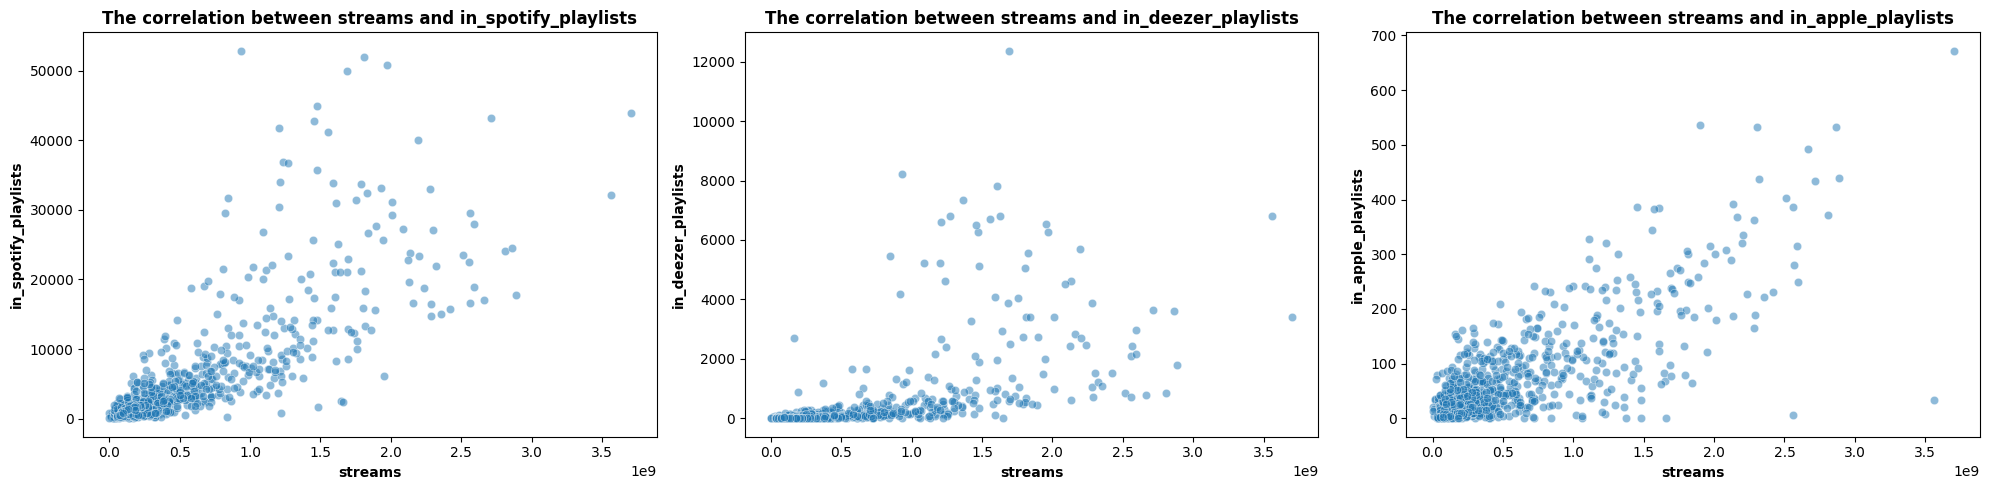

In [69]:
x = ['streams', 'streams', 'streams']
y = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for i in range(len(x)):
    sns.scatterplot(x=x[i], y=y[i], data=df, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'The correlation between {x[i]} and {y[i]}', fontweight='bold')
    axes[i].set_xlabel(x[i], fontweight='bold')
    axes[i].set_ylabel(y[i], fontweight='bold')
plt.tight_layout()
plt.show()

---
<p style="text-align:center; font-size:30px;">END</p>